# Importing Libraries

In [16]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
sys.version

'3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]'

# Loading the data

In [17]:
# load data
loan = pd.read_csv('loan.csv', low_memory= False)

# Data Pre-Processing

In [19]:
loan.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [20]:
loan.count()

id                             887379
member_id                      887379
loan_amnt                      887379
funded_amnt                    887379
funded_amnt_inv                887379
term                           887379
int_rate                       887379
installment                    887379
grade                          887379
sub_grade                      887379
emp_title                      835917
emp_length                     842554
home_ownership                 887379
annual_inc                     887375
verification_status            887379
issue_d                        887379
loan_status                    887379
pymnt_plan                     887379
url                            887379
desc                           126028
purpose                        887379
title                          887227
zip_code                       887379
addr_state                     887379
dti                            887379
delinq_2yrs                    887350
earliest_cr_

In [21]:
loan.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       51462
emp_length                      44825
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           761351
purpose                             0
title                             152
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        29
earliest_cr_

In [22]:
null_cols = ['desc',
'mths_since_last_delinq',
'mths_since_last_record',
'next_pymnt_d',
'mths_since_last_major_derog',
'annual_inc_joint',
'dti_joint',
'verification_status_joint',
'open_acc_6m',
'open_il_6m',
'open_il_12m',
'open_il_24m',
'mths_since_rcnt_il',
'total_bal_il',
'il_util',
'open_rv_12m',
'open_rv_24m',
'max_bal_bc',
'all_util',
'inq_fi',
'total_cu_tl',
'inq_last_12m'
]

In [23]:
loan.drop(null_cols, axis=1, inplace=True)

# Exploring the target column

The target column we are interested on is loan status

In [24]:
loan.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

First of all, Current and Issued loans are still in progress, so they cannot be used for training. Let's split them.

In [26]:
in_progress_index = ['Current', 'Issued']

In [36]:
def split_loan_in_progress(data):
    """Return table of loan in progress. It drops the loan in progress from loan data internally."""
    progress_bool = data.loan_status.isin(in_progress_index)
    loan_in_progress = data[progress_bool].drop('loan_status', axis=1)
    data.drop(list(loan_in_progress.index), axis=0, inplace=True)
    return loan_in_progress

In [37]:
loan_in_progress = split_loan_in_progress(loan)

In [38]:
print("Shape of loan_in_progress:", loan_in_progress.shape)
print("Shape of loan :", loan.shape)

Shape of loan_in_progress: (610239, 51)
Shape of loan : (277140, 52)


There are many classes in loan_status feature. However, I want to divide it to 3 classses: bad, warning and safe.

In [39]:
bad_index = ['Charged Off',
'Does not meet the credit policy. Status:Charged Off',
'Default'
,'Late (31-120 days)',
'Late (16-30 days)',
'In Grace Period']
safe_index = ['Fully Paid',
'Does not meet the credit policy. Status:Fully Paid'
]

In [40]:
def categorize_target(data):
    """Returns encoded loan status: Safe, Warning and Bad"""
    def func(x):
        if x['loan_status'] in bad_index:
            return 0
        else:
            return 1
    data['loan_status_coded'] = data.apply(func, axis=1)
    data.drop('loan_status', axis=1, inplace=True)
    return data

In [41]:
loan = categorize_target(loan)

In [42]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status_coded
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,161.03,Sep-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1


# Exploratory Data Analysis

In [43]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc    

### Loan_amount

loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit
department reduces the loan amount, then it will be reflected in this value.

C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


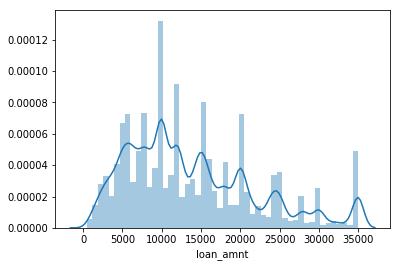

In [44]:
sns.distplot(loan["loan_amnt"])

### Funded Amount and Funded Amount Investors

funded_amnt: The total amount committed to that loan at that point in time.
funded_amnt_inv: The total amount committed by investors for that loan at that point in time.

C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


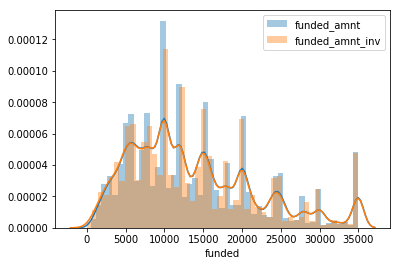

In [46]:
plt.figure()
sns.distplot(loan["funded_amnt"], label="funded_amnt")
sns.distplot(loan["funded_amnt_inv"], label="funded_amnt_inv")
plt.legend()
plt.xlabel("funded")
plt.show()

### Term

term: The number of payments on the loan. Values are in months and can be eithe

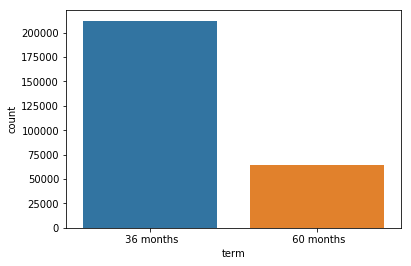

In [48]:
sns.countplot(loan["term"])

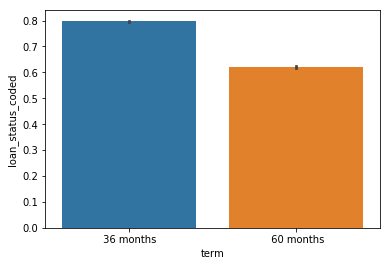

In [49]:
sns.barplot(x="term", y="loan_status_coded", data=loan)

### Interest Rate

int_rate: Rate of interest on the approvedloans

C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


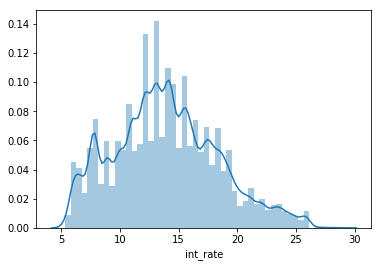

In [50]:
sns.distplot(loan["int_rate"])

### Installment

installment: The monthly payment owed by the borrower if the loan originates.

C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


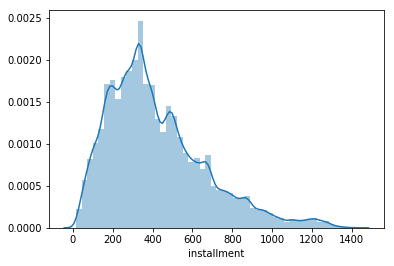

In [52]:
sns.distplot(loan["installment"])

### Grade

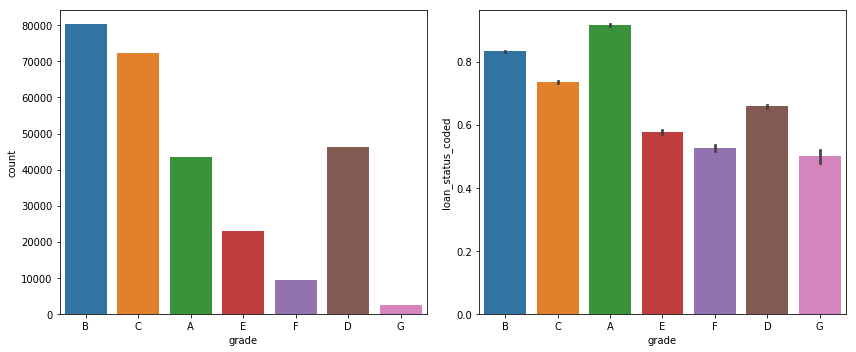

In [53]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(loan["grade"])
plt.subplot(1,2,2)
sns.barplot(x="grade", y="loan_status_coded", data=loan)
plt.tight_layout()
plt.show()

### Sub_grade

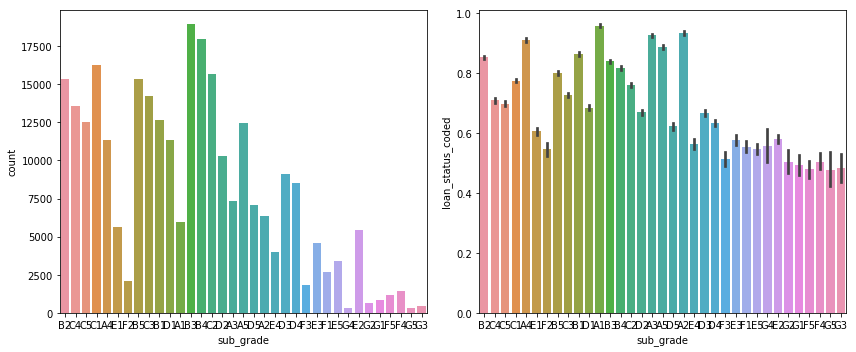

In [54]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(loan["sub_grade"])
plt.subplot(1,2,2)
sns.barplot(x="sub_grade", y="loan_status_coded", data=loan)
plt.tight_layout()
plt.show()

It would be better to extract just a number from sub_grade rather than grade as the grade is already being
provided by the grade feature

In [56]:
def ext_num_from_sub_grade(data):
    data['sub_grade'] = data['sub_grade'].map(lambda x: int(x.lstrip('ABCDEFG')))
    return data

In [57]:
ext_num_from_sub_grade(loan)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status_coded
0,1077501,1296599,5000.0,5000.0,4975.000000,36 months,10.65,162.87,B,2,...,171.62,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
1,1077430,1314167,2500.0,2500.0,2500.000000,60 months,15.27,59.83,C,4,...,119.66,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
2,1077175,1313524,2400.0,2400.0,2400.000000,36 months,15.96,84.33,C,5,...,649.91,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
3,1076863,1277178,10000.0,10000.0,10000.000000,36 months,13.49,339.31,C,1,...,357.48,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
5,1075269,1311441,5000.0,5000.0,5000.000000,36 months,7.90,156.46,A,4,...,161.03,Sep-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
7,1072053,1288686,3000.0,3000.0,3000.000000,36 months,18.64,109.43,E,1,...,111.34,Dec-2014,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
8,1071795,1306957,5600.0,5600.0,5600.000000,60 months,21.28,152.39,F,2,...,152.39,Aug-2012,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
9,1071570,1306721,5375.0,5375.0,5350.000000,60 months,12.69,121.45,B,5,...,121.45,Mar-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0
10,1070078,1305201,6500.0,6500.0,6500.000000,60 months,14.65,153.45,C,3,...,1655.54,Dec-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1
11,1069908,1305008,12000.0,12000.0,12000.000000,36 months,12.69,402.54,B,5,...,6315.30,Aug-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1


In [58]:
loan.sub_grade.value_counts()

4    57124
3    56406
2    55869
1    55389
5    52352
Name: sub_grade, dtype: int64

Now sub-feature has only numeric values

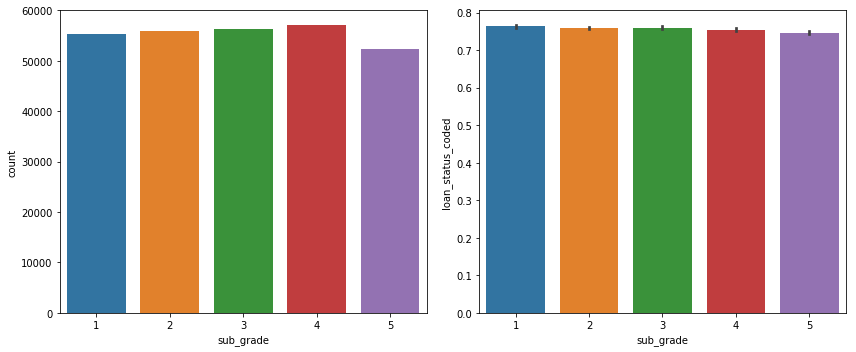

In [59]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(loan["sub_grade"])
plt.subplot(1,2,2)
sns.barplot(x="sub_grade", y="loan_status_coded", data=loan)
plt.tight_layout()
plt.show()

### Emp_Title

The job title supplied by the borrower when applying for the loan

In [61]:
loan.emp_title.isnull().sum()/loan.shape[0] * 100

5.55387168939886

In [62]:
loan.emp_title.value_counts().head()

Manager             2229
Teacher             2223
Supervisor           995
Registered Nurse     975
RN                   960
Name: emp_title, dtype: int64

In [63]:
loan.emp_title.value_counts()[0]/loan.shape[0] * 100

0.8042866421303313

As the distribution of the Manager accounts to the highest number of values yet this feature cannot be
represented for predictions

In [65]:
def drop_emp_title(data):
    data.drop('emp_title', axis=1, inplace=True)
    return None

In [66]:
drop_emp_title(loan)

### emp_length

emp_length: Employment length in years. The possible values are from 0 to 10+

In [68]:
loan.emp_length.value_counts()

10+ years    83918
2 years      25828
< 1 year     23210
3 years      22436
5 years      19518
1 year       18643
4 years      17660
6 years      15999
7 years      15281
8 years      13028
9 years      10518
Name: emp_length, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

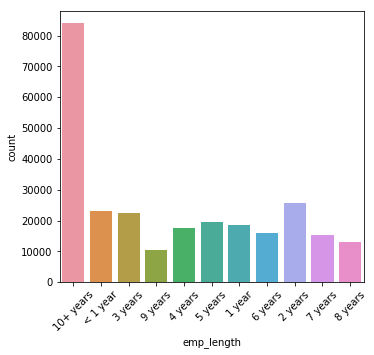

In [70]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(loan["emp_length"])
plt.xticks(rotation=45)

### Home_Ownership

home_ownership: The home ownership provided by the borrower during the registration. Values are Rent,
Mortgage, Other

In [71]:
loan.home_ownership.value_counts()

MORTGAGE    135573
RENT        116948
OWN          24391
OTHER          179
NONE            48
ANY              1
Name: home_ownership, dtype: int64

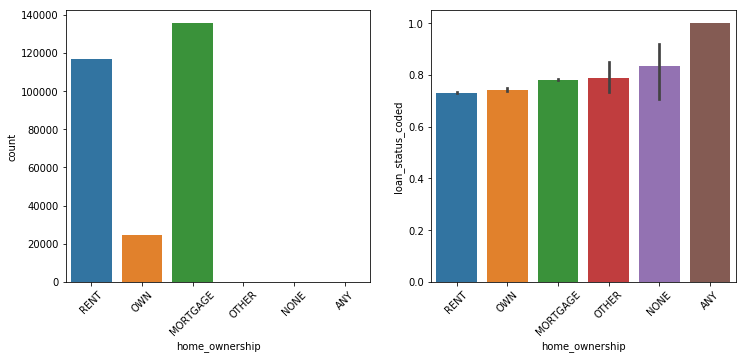

In [72]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(loan["home_ownership"])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(x="home_ownership", y="loan_status_coded", data=loan)
plt.xticks(rotation=45)
plt.show()

### Annual Income

annual_inc: The self-reported annual income provided by the borrower during registration.

In [74]:
loan.annual_inc.isnull().sum()

4

There are only 4 missing values. Let's replace them with median vlaue of feature which is more robust to outlier
than mean.

In [76]:
print("Median of annual_inc: ", loan.annual_inc.median())
print("Mean of annual_inc: ", loan.annual_inc.mean())

Median of annual_inc:  62000.0
Mean of annual_inc:  72483.81087083573


In [77]:
def fill_na_annual_inc(data):
    data.annual_inc.fillna(data.annual_inc.median(), inplace=True)
    return None
fill_na_annual_inc(loan)

C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


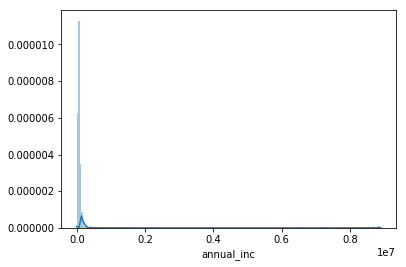

In [78]:
sns.distplot(loan["annual_inc"], bins=200)

C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 500000)

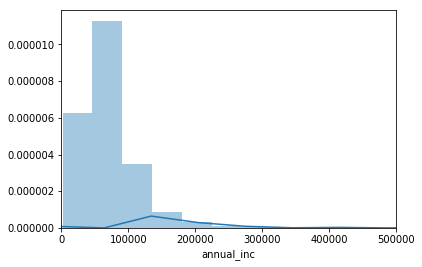

In [79]:
sns.distplot(loan["annual_inc"], bins=200)
plt.xlim(0,500000)

### Verification_Status

In [80]:
loan.verification_status.value_counts()

Verified           101552
Not Verified        92571
Source Verified     83017
Name: verification_status, dtype: int64

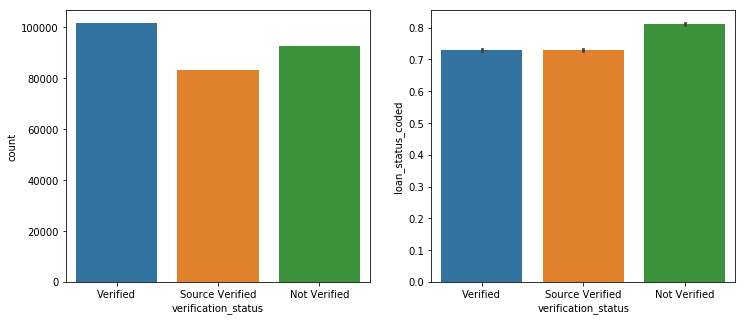

In [81]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(loan["verification_status"])
plt.subplot(1,2,2)
sns.barplot(x="verification_status", y="loan_status_coded", data=loan)
plt.show()

### Issue_d

issue_d: The month and year which the loan was funded.

In [83]:
loan.issue_d.value_counts().head()

Oct-2014    10148
Jul-2014     9605
Apr-2014     7357
Dec-2013     7055
May-2014     7052
Name: issue_d, dtype: int64

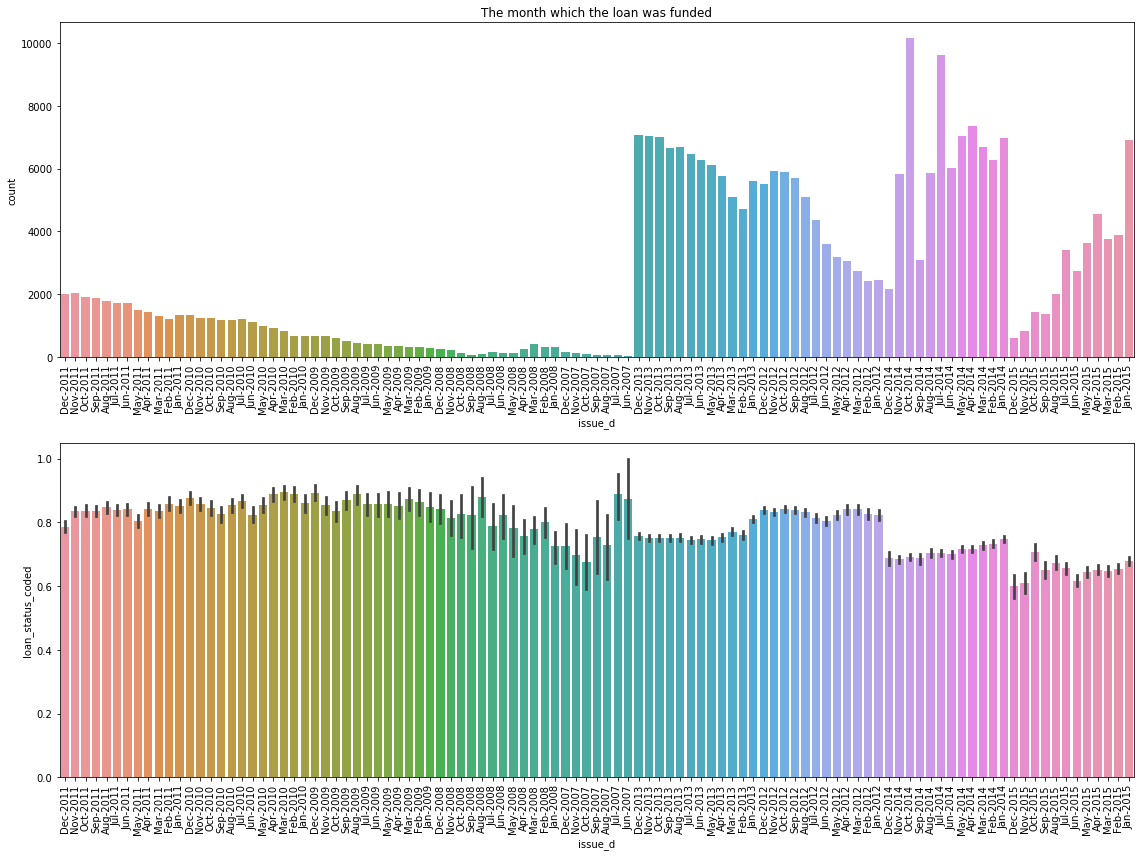

In [84]:
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
plt.title('The month which the loan was funded')
sns.countplot(loan["issue_d"])
plt.xticks(rotation='vertical')
plt.subplot(2,1,2)
sns.barplot(x="issue_d", y="loan_status_coded", data=loan)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

We see that it is a time series graph, if we include this column in our model it increases the model dimension by
more then 100. But the model performance is not greatly affected without this feature so I have decided to not
include this feature in the prediction

In [85]:
def drop_issue_d(data):
    data.drop('issue_d', axis=1, inplace=True)
    return None
drop_issue_d(loan)

### pyment_plan

pyment_plan: Indicates if a payment plan is put in the place for the loan

In [86]:
loan.pymnt_plan.value_counts()

n    277133
y         7
Name: pymnt_plan, dtype: int64

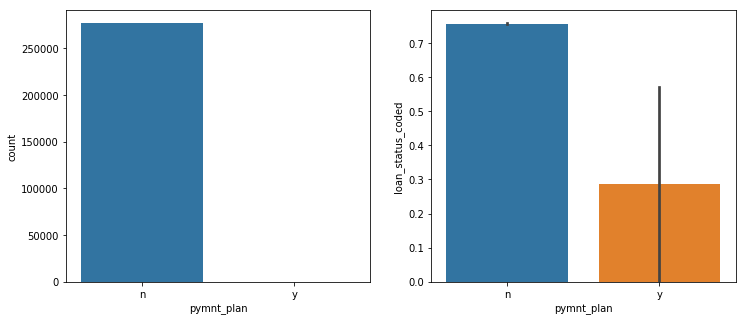

In [87]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(loan["pymnt_plan"])
plt.subplot(1,2,2)
sns.barplot(x="pymnt_plan", y="loan_status_coded", data=loan)
plt.show()

In [88]:
def drop_pymnt_plan(data):
    data.drop('pymnt_plan', axis=1, inplace=True)
    return None
drop_pymnt_plan(loan)

### URL

url: Gives url of the page

In [89]:
loan.url.head()

0    https://www.lendingclub.com/browse/loanDetail....
1    https://www.lendingclub.com/browse/loanDetail....
2    https://www.lendingclub.com/browse/loanDetail....
3    https://www.lendingclub.com/browse/loanDetail....
5    https://www.lendingclub.com/browse/loanDetail....
Name: url, dtype: object

In [91]:
def drop_url(data):
    data.drop('url', axis=1, inplace=True)
    return None
drop_url(loan)

### Purpose

Purpose: A category provided by the borrower for the loan request

In [92]:
loan.purpose.value_counts()

debt_consolidation    163180
credit_card            54276
home_improvement       16356
other                  15807
major_purchase          6785
small_business          5245
car                     3845
medical                 3125
moving                  2241
wedding                 2022
house                   1816
vacation                1733
educational              422
renewable_energy         287
Name: purpose, dtype: int64

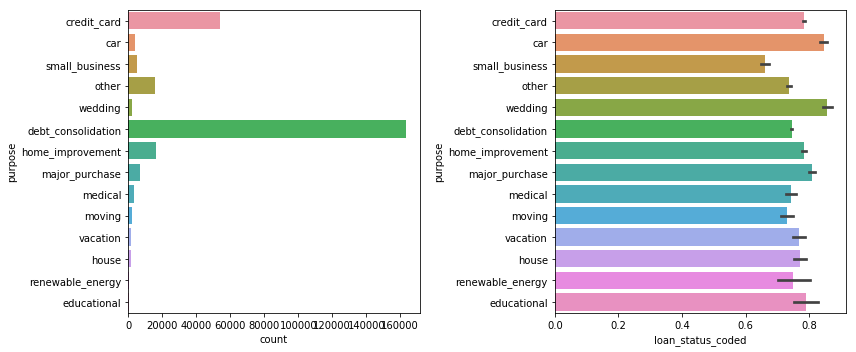

In [93]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(y=loan["purpose"])
plt.subplot(1,2,2)
sns.barplot(y="purpose", x="loan_status_coded", data=loan)
plt.tight_layout()
plt.show()

### Title

Title: The loan title provided by the borrower

In [95]:
loan.title.value_counts()

Debt consolidation                                 83931
Credit card refinancing                            26050
Debt Consolidation                                 11398
Home improvement                                    7778
Other                                               6988
Consolidation                                       3691
debt consolidation                                  3335
Debt Consolidation Loan                             3119
Major purchase                                      2519
Business                                            2051
Personal Loan                                       1685
Credit Card Consolidation                           1663
Medical expenses                                    1562
consolidation                                       1435
Home Improvement                                    1282
Consolidation Loan                                  1238
Car financing                                       1096
Credit Card Refinance          

In [96]:
loan.title.isnull().sum()

15

There are 14 null values. Since it is a categorical data, I will fill null values with 'Unknown' value.

In [97]:
def fill_na_title(data):
    data.title.fillna('Unknown', inplace=True)
    return None
fill_na_title(loan)

In [98]:
sum(loan.title=='Unknown')

16

### zip_code, addr_state

zip_code: The first 3 numbers of the zip code provided by the borrower in the loan application.
addr_state: The state provided by the borrower in the loan application

In [99]:
loan.zip_code.value_counts().head()

945xx    3520
112xx    3123
750xx    3005
100xx    2739
900xx    2688
Name: zip_code, dtype: int64

It looks like zip_code does not represent data effectively. I will drop this feature.

In [100]:
def drop_zip_code (data):
    data.drop('zip_code', axis=1, inplace=True)
    return None
drop_zip_code(loan)

In [101]:
loan.addr_state.value_counts().head()

CA    46519
NY    23694
TX    21193
FL    19329
NJ    10549
Name: addr_state, dtype: int64

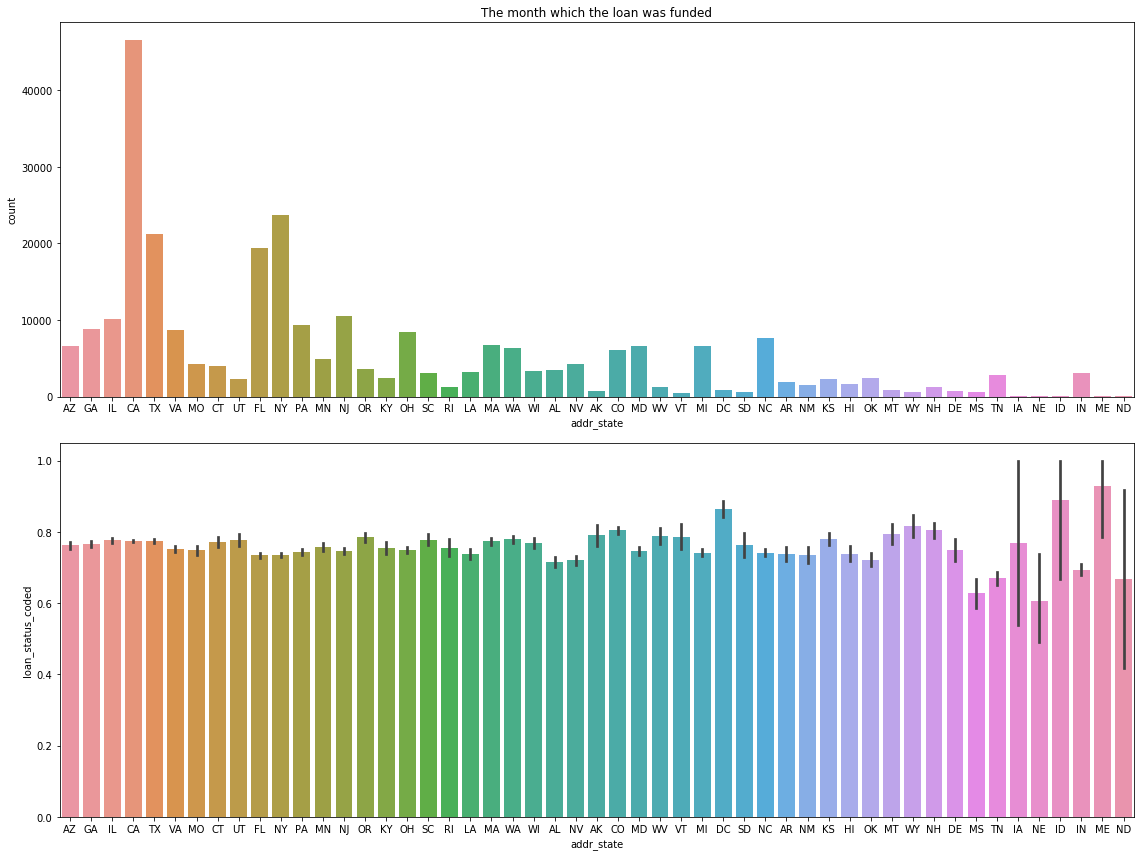

In [102]:
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
plt.title('The month which the loan was funded')
sns.countplot(loan["addr_state"])
plt.subplot(2,1,2)
sns.barplot(x="addr_state", y="loan_status_coded", data=loan)
plt.tight_layout()
plt.show()

For the same reason as issue_d, I will drop this feature.

In [103]:
def drop_addr_state(data):
    data.drop('addr_state', axis=1, inplace=True)
    return None
drop_addr_state(loan)

### dti

dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding
mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


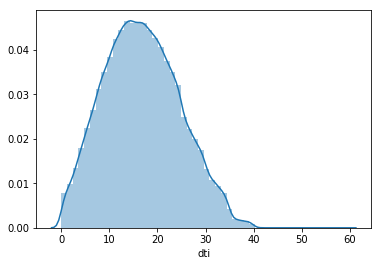

In [104]:
sns.distplot(loan.dti)

### delinq_2yrs

delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the
past 2 yea

In [105]:
loan.delinq_2yrs.isnull().sum()

29

In [106]:
def fill_na_delinq_2yrs(data):
    data.delinq_2yrs.fillna(data.delinq_2yrs.median(), inplace=True)
    return None

In [107]:
fill_na_delinq_2yrs(loan)

Considering the entire number of data, only small number of values are null. Let's fill them with median of
column

In [108]:
loan.delinq_2yrs.value_counts()

0.0     230858
1.0      31595
2.0       8957
3.0       3040
4.0       1249
5.0        642
6.0        329
7.0        178
8.0        104
9.0         63
10.0        39
12.0        26
11.0        24
13.0         9
14.0         9
15.0         5
18.0         4
17.0         2
16.0         2
29.0         1
21.0         1
19.0         1
20.0         1
22.0         1
Name: delinq_2yrs, dtype: int64

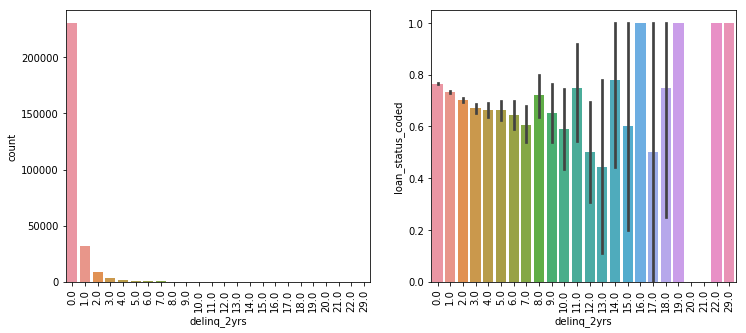

In [109]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(loan["delinq_2yrs"])
plt.xticks(rotation="vertical")
plt.subplot(1,2,2)
sns.barplot(x="delinq_2yrs", y="loan_status_coded", data=loan)
plt.xticks(rotation="vertical")
plt.show()

### earliest_cr_line

earliest_cr_line: The month the borrower's earliest reported credit line was opened

In [111]:
loan.earliest_cr_line.isnull().sum()

29

In [112]:
loan.earliest_cr_line.value_counts().head()

Oct-2000    2272
Oct-2001    2135
Oct-1999    2124
Nov-2000    2094
Aug-2000    2082
Name: earliest_cr_line, dtype: int64

In [114]:
def drop_earliest_cr_line(data):
    data.drop('earliest_cr_line', axis=1, inplace=True)
    return None
drop_earliest_cr_line(loan)

### inq_last_6mths

inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

In [116]:
loan.inq_last_6mths.isnull().sum()

29

In [117]:
loan.inq_last_6mths.value_counts()

0.0     134729
1.0      79298
2.0      37674
3.0      17340
4.0       4809
5.0       1973
6.0        832
7.0        193
8.0        118
9.0         50
10.0        24
12.0        15
11.0        15
15.0         9
14.0         6
13.0         6
18.0         4
16.0         3
19.0         2
17.0         2
24.0         2
28.0         1
31.0         1
32.0         1
25.0         1
33.0         1
20.0         1
27.0         1
Name: inq_last_6mths, dtype: int64

In [120]:
def fill_na_inq_last_6mths(data):
    data.inq_last_6mths.fillna(data.inq_last_6mths.median(), inplace=True)
    return None
fill_na_inq_last_6mths(loan)

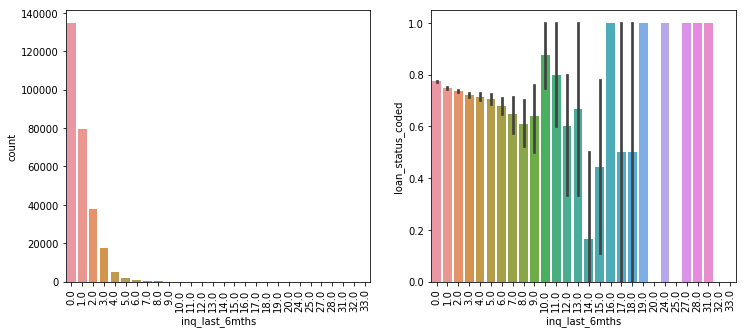

In [121]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(loan["inq_last_6mths"])
plt.xticks(rotation="vertical")
plt.subplot(1,2,2)
sns.barplot(x="inq_last_6mths", y="loan_status_coded", data=loan)
plt.xticks(rotation="vertical")
plt.show()

### open_acc

open_acc: The number of open credit lines in the borrower's credit file.

In [123]:
loan.open_acc.isnull().sum()

29

In [124]:
loan.open_acc.value_counts().head()

9.0     26475
8.0     25282
10.0    24994
11.0    23106
7.0     22843
Name: open_acc, dtype: int64

In [125]:
def fill_na_open_acc(data):
    data.open_acc.fillna(data.open_acc.median(), inplace=True)
    return None
fill_na_open_acc(loan)

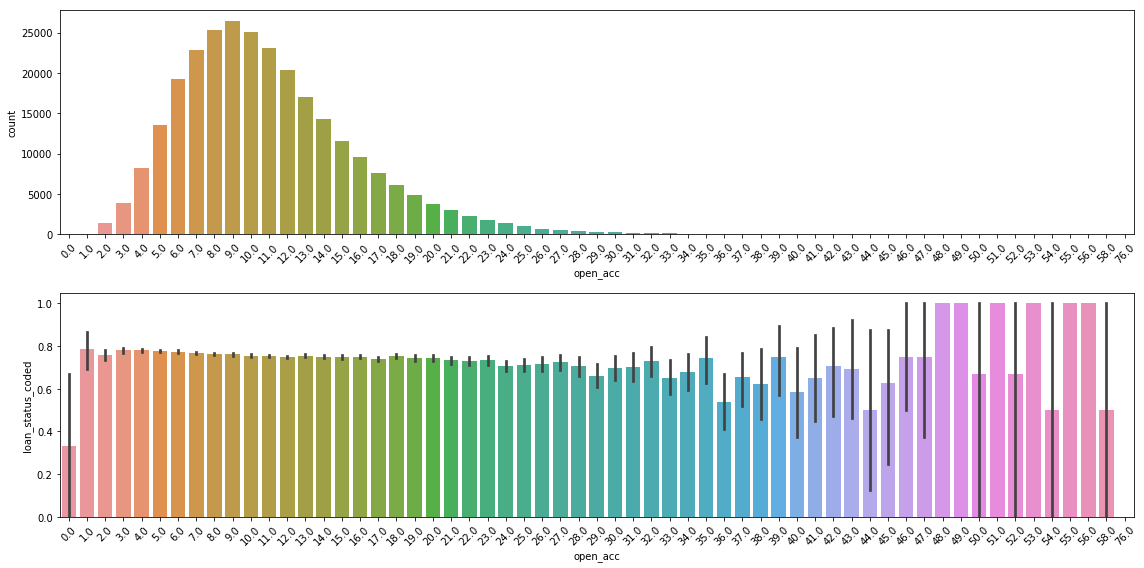

In [126]:
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.countplot(loan["open_acc"])
plt.xticks(rotation=45)
plt.subplot(2,1,2)
sns.barplot(x="open_acc", y="loan_status_coded", data=loan)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### pub_rec

pub_rec: Number of derogatory public records

In [127]:
loan.pub_rec.isnull().sum()

29

In [128]:
loan.pub_rec.value_counts()

0.0     242299
1.0      30572
2.0       2975
3.0        805
4.0        249
5.0        110
6.0         53
7.0         20
8.0          9
9.0          7
10.0         5
11.0         3
12.0         2
15.0         1
20.0         1
Name: pub_rec, dtype: int64

In [130]:
def fill_na_pub_rec(data):
    data.pub_rec.fillna(data.pub_rec.median(), inplace=True)
    return None
fill_na_pub_rec(loan)

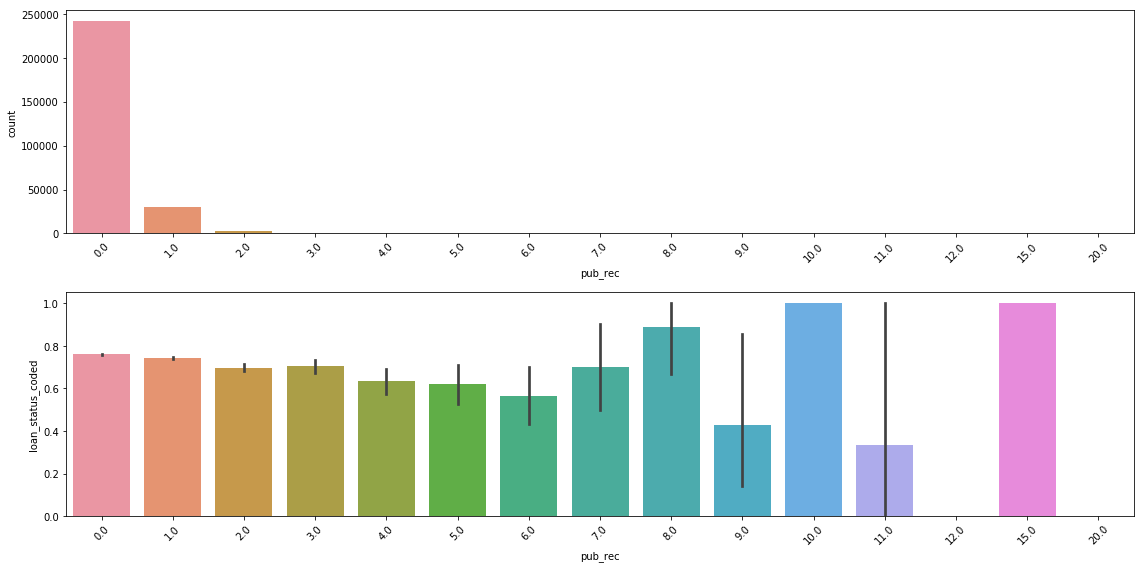

In [131]:
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.countplot(loan["pub_rec"])
plt.xticks(rotation=45)
plt.subplot(2,1,2)
sns.barplot(x="pub_rec", y="loan_status_coded", data=loan)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### revol_bal

revol_bal: Total credit revolving balance

C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


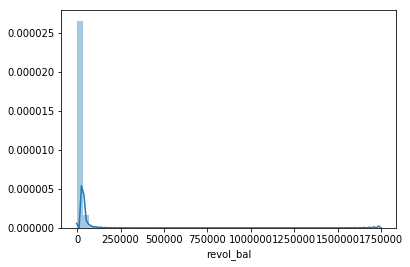

In [132]:
sns.distplot(loan.revol_bal)

C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 100000)

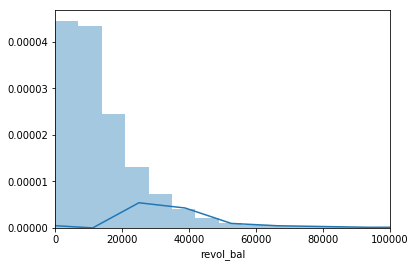

In [133]:
sns.distplot(loan.revol_bal, bins=250)
plt.xlim(0,100000)

### Encoding Categorical Variables using one hot encoder

In [135]:
features = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
'annual_inc', 'verification_status', 'purpose', 'dti',
'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util',
'total_acc', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt',
'total_rev_hi_lim', 'loan_status_coded']
categorical = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
'purpose', 'initial_list_status']

In [136]:
loan = loan[features]

In [137]:
def one_hot_encoder(loan):
    categorical_variables = categorical
    loan_one_hot_encoded = pd.get_dummies(loan, columns=categorical_variables)
    print("====================[Data Types]====================")
    print(loan_one_hot_encoded.dtypes)
    return loan_one_hot_encoded
loan_one_hot_encoded = one_hot_encoder(loan)

====================[Data Types]====================
loan_amnt                              float64
funded_amnt                            float64
funded_amnt_inv                        float64
int_rate                               float64
installment                            float64
sub_grade                                int64
annual_inc                             float64
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
open_acc                               float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
total_pymnt                            float64
total_pymnt_inv                        float64
total_rec_prncp                        float64
total_rec_int                          float64
last_pymnt_amnt                        float64
total_rev_hi_lim                       float64
loan_st

### Examining the target variable

Examining the loan status distribution
We have to remind that the distribution of our data is highly skewed
As we can see that most of the loans are safe loans. This would affect our training model because telling that
every loan is safe can be the best answer in terms of accuracy. We can prevent this by the following ways
1. Different wighting in training
2. Down sample to the smalles set
3. Up sample to the largest set

I implemented both down sampling and up sampling where as I downsampled the dataset using by just splitting
the data set equally. I up sampled the dataset using SMOTE algorithm below.

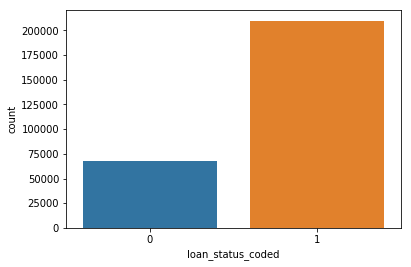

In [138]:
sns.countplot(loan["loan_status_coded"])

In [139]:
loan= loan.dropna()

### Downsampling the target variable

In [140]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,total_rev_hi_lim,loan_status_coded
42538,12000.0,12000.0,12000.0,36 months,13.53,407.40,B,5,10+ years,RENT,...,68.8,32.0,w,13359.770000,13359.77,11999.99,1359.78,119.17,8100.0,1
42544,3000.0,3000.0,3000.0,36 months,12.85,100.87,B,4,10+ years,RENT,...,54.2,26.0,f,3181.532981,3181.53,3000.00,181.53,2677.23,5300.0,1
42546,28000.0,28000.0,28000.0,36 months,7.62,872.52,A,3,5 years,MORTGAGE,...,54.6,31.0,w,29150.980000,29150.98,28000.00,1150.98,23915.86,54200.0,1
42549,24000.0,24000.0,24000.0,36 months,13.53,814.80,B,5,10+ years,MORTGAGE,...,76.7,39.0,w,28652.210000,28652.21,24000.00,4652.21,10726.61,28200.0,1
42550,8000.0,8000.0,8000.0,36 months,10.99,261.88,B,2,2 years,MORTGAGE,...,34.6,16.0,f,4990.030000,4990.03,3854.81,1120.22,276.88,20800.0,0


In [141]:
safe_loans = loan[loan["loan_status_coded"] == 1]
bad_loans = loan[loan["loan_status_coded"] == 0]

In [142]:
safe_loans.count()

loan_amnt              148065
funded_amnt            148065
funded_amnt_inv        148065
term                   148065
int_rate               148065
installment            148065
grade                  148065
sub_grade              148065
emp_length             148065
home_ownership         148065
annual_inc             148065
verification_status    148065
purpose                148065
dti                    148065
delinq_2yrs            148065
inq_last_6mths         148065
open_acc               148065
revol_bal              148065
revol_util             148065
total_acc              148065
initial_list_status    148065
total_pymnt            148065
total_pymnt_inv        148065
total_rec_prncp        148065
total_rec_int          148065
last_pymnt_amnt        148065
total_rev_hi_lim       148065
loan_status_coded      148065
dtype: int64

### Sampling safe loans for equal distribution

In [143]:
percentage_safe_loans = round((len(bad_loans)/float(len(safe_loans)))*100)

In [144]:
print(percentage_safe_loans)

36


In [145]:
safe_loans_sampled = safe_loans.sample(frac = 0.36, random_state= 1)

In [146]:
loans_data = bad_loans.append(safe_loans_sampled)

In [147]:
loans_data.count()

loan_amnt              106425
funded_amnt            106425
funded_amnt_inv        106425
term                   106425
int_rate               106425
installment            106425
grade                  106425
sub_grade              106425
emp_length             106425
home_ownership         106425
annual_inc             106425
verification_status    106425
purpose                106425
dti                    106425
delinq_2yrs            106425
inq_last_6mths         106425
open_acc               106425
revol_bal              106425
revol_util             106425
total_acc              106425
initial_list_status    106425
total_pymnt            106425
total_pymnt_inv        106425
total_rec_prncp        106425
total_rec_int          106425
last_pymnt_amnt        106425
total_rev_hi_lim       106425
loan_status_coded      106425
dtype: int64

In [149]:
features = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
'annual_inc', 'verification_status', 'purpose', 'dti',
'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util',
'total_acc', 'initial_list_status', 'total_pymnt', 'total_pymnt_inv',
'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt',
'total_rev_hi_lim', 'loan_status_coded']
categorical = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
'purpose', 'initial_list_status']

In [150]:
loan = loans_data[features]

In [152]:
def one_hot_encoder(loan):
    categorical_variables = categorical
    loan_one_hot_encoded = pd.get_dummies(loan, columns=categorical_variables)
    print("====================[Data Types]====================")
    print(loan_one_hot_encoded.dtypes)
    return loan_one_hot_encoded
loan_one_hot_encoded = one_hot_encoder(loan)

====================[Data Types]====================
loan_amnt                              float64
funded_amnt                            float64
funded_amnt_inv                        float64
int_rate                               float64
installment                            float64
sub_grade                                int64
annual_inc                             float64
dti                                    float64
delinq_2yrs                            float64
inq_last_6mths                         float64
open_acc                               float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
total_pymnt                            float64
total_pymnt_inv                        float64
total_rec_prncp                        float64
total_rec_int                          float64
last_pymnt_amnt                        float64
total_rev_hi_lim                       float64
loan_st

In [153]:
loan_one_hot_encoded.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w
42550,8000.0,8000.0,8000.0,10.99,261.88,2,33000.0,15.75,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
42551,11500.0,11500.0,11500.0,22.90,323.54,4,32760.0,27.06,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
42563,10000.0,10000.0,10000.0,13.98,232.58,1,25000.0,27.03,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
42570,14825.0,14825.0,14825.0,18.25,537.83,3,175000.0,8.07,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
42593,15000.0,15000.0,15000.0,17.57,539.06,2,60000.0,3.68,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0


### Train- Test Split

In [154]:
from sklearn.model_selection import train_test_split
# Train-Test split
y = loan_one_hot_encoded.loan_status_coded
X = loan_one_hot_encoded.drop("loan_status_coded", axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
stratify=y)

In [155]:
print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (85140, 63)
Shape of y_train:  (85140,)
Shape of x_test:  (21285, 63)
Shape of y_test:  (21285,)


### Feature Scaling

In [156]:
from sklearn.preprocessing import StandardScaler

In [157]:
sr_X = StandardScaler()

In [158]:
X_train = sr_X.fit_transform(x_train)

In [159]:
X_test = sr_X.fit_transform(x_test)

### Builiding Decisiontree classifier

In [160]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model= DecisionTreeClassifier()

In [161]:
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Predictions

In [162]:
pred =decision_tree_model.predict(X_test)

### Evaluating the performance of the model

In [163]:
decision_tree_model.score(X_test, y_test)

0.9847310312426591

This model classifies good and bad loans with an accuracy of 98.6 %

In [164]:
from sklearn.metrics import confusion_matrix
cf =confusion_matrix(y_test, pred)

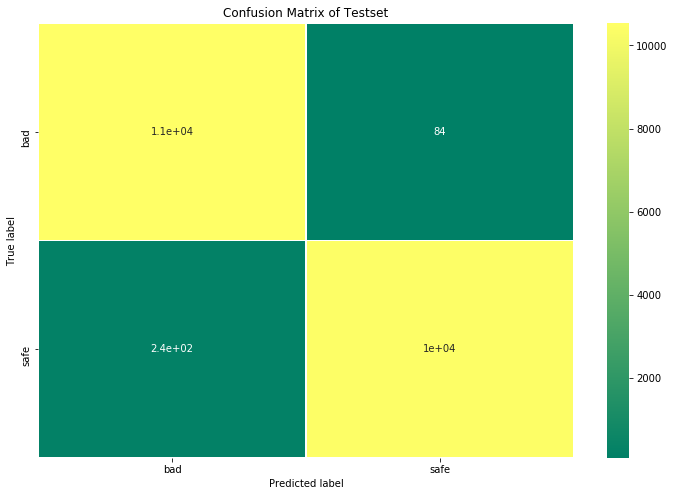

In [165]:
# Plot normalized confusion matrix
import matplotlib.cm as cm
plt.figure(figsize=(12,8))
sns.heatmap(cf, annot=True, linewidths=.5, cmap=cm.summer,xticklabels=[
'bad','safe'], yticklabels=['bad','safe'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix of Testset")
plt.show()